@Misc{,
    author = {Fernando Nogueira},
    title = {{Bayesian Optimization}: Open source constrained global optimization tool for {Python}},
    year = {2014--},
    url = " https://github.com/fmfn/BayesianOptimization"
}

### pip install bayesian-optimization (in terminal)

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

In [2]:
#from bayes_opt.logger import JSONLogger
#from bayes_opt.event import Events

### Specifying the function to be optimized:

In [76]:
xmin = -100
xmax = 100
ymin = -100
ymax = 100

#Change the function to be optimized here 
def func(x,y):
    return np.sin(x**2) + 3*y


### Plot the objective function:

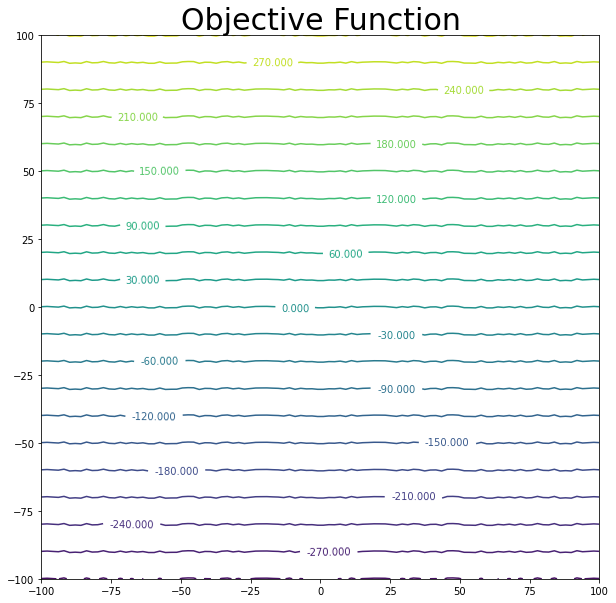

In [77]:
x = np.linspace(xmin,xmax,100)
y = np.linspace(ymin,ymax,100)
xx, yy = np.meshgrid(x,y)
z = func(xx,yy)
fig, ax = plt.subplots(figsize=(10,10))
cs = ax.contour(z, extent=(xmin,xmax,ymin,ymax), levels = 20)
ax.clabel(cs, inline=1, fontsize=10)
ax.set_title('Objective Function', fontsize = 30)
plt.show()

1. Import the "BayesianOptimization" object.
2. Specify a function to be optimized, f. 
3. Specify its parameters with their corresponding bounds, pbounds. (This is a constrained optimization technique, so you must specify the minimum and maximum values that can be probed for each parameter in order for it to work.)

In [78]:
from bayes_opt import BayesianOptimization


# Bounded region of parameter space
pbounds = {'x': (xmin, xmax), 'y': (ymin, ymax)}

optimizer = BayesianOptimization(f=func, pbounds=pbounds, verbose=3) 

Parameters to maximized:

<strong>n_iter</strong>: Specifies the number of steps of the Bayesian optimization to perform. Iterating over more steps will increase the liklihood of finding the maximum.

<strong>init_points</strong>: Specifies the number of steps of random exploration to perform. Random exploration can help by diversifying the exploration space.

In [79]:
optimizer.maximize(
    init_points=10,
    n_iter=10,
)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  30.51    | -92.34    |  10.32    |
|  2        | -179.8    | -96.15    | -60.0     |
|  3        |  286.7    |  13.36    |  95.36    |
|  4        | -30.62    |  69.58    | -10.22    |
|  5        | -138.5    |  33.03    | -45.9     |
|  6        |  124.5    | -33.99    |  41.65    |
|  7        | -185.4    |  53.7     | -61.79    |
|  8        | -170.0    | -23.94    | -56.99    |
|  9        | -205.5    |  62.01    | -68.44    |
|  10       | -208.2    |  79.63    | -69.75    |
|  11       |  299.7    |  100.0    |  100.0    |
|  12       |  298.4    | -97.55    |  99.65    |
|  13       |  298.7    | -44.4     |  99.88    |
|  14       |  300.3    |  63.97    |  99.77    |
|  15       |  300.9    | -76.86    |  100.0    |
|  16       |  298.7    |  28.55    |  99.92    |
|  17       |  299.8    |  65.23    |  99.59    |
|  18       |  299.6    |  76.56    |  99.91    |


The property <strong>optimizer.max</strong> returns the best combination of parameters and target value found.

In [80]:
best_params = optimizer.max["params"]

found_x = best_params['x']
found_y = best_params['y']

print("Found x: {}, f: {}".format(found_x, (func(found_x, found_y))))
print("Found y: {}, f: {}".format(found_y, (func(found_x, found_y))))

Found x: -76.86478465706776, f: 300.9089093379882
Found y: 100.0, f: 300.9089093379882


## Monte Carlo Simulation to Test the Performance of the Optimizer

This will measure the performance of the optimizer on a specific function. The number of trials and the number of iterations can be varied. 

In [81]:
x = []
y = []
z = []

pbounds = {'x': (xmin, xmax), 'y': (ymin, ymax)}

for i in range(5):
    
    optimizer = BayesianOptimization(f=func, pbounds=pbounds, verbose=2)
    optimizer.maximize(init_points=10, n_iter=10)
    
    best_params = optimizer.max["params"]
    found_x = best_params['x']
    found_y = best_params['y']
    print("Found x: {}, f: {}".format(found_x, (func(found_x, found_y))))
    print("Found y: {}, f: {}".format(found_y, (func(found_x, found_y))))
    x.append(found_x)
    y.append(found_y)
    z.append(func(found_x, found_y))
    if i%10 == 0:
        print(i)
    else:
        pass


|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  221.4    | -9.138    |  73.49    |
|  2        |  139.8    |  87.15    |  46.93    |
|  3        | -170.6    | -43.01    | -56.95    |
|  4        |  77.66    | -7.857    |  26.18    |
|  5        | -94.84    |  11.6     | -31.8     |
|  6        |  192.9    |  15.16    |  64.44    |
|  7        |  217.5    | -90.92    |  72.82    |
|  8        | -17.91    | -15.64    | -5.803    |
|  9        |  167.3    |  14.11    |  56.07    |
|  10       |  25.32    | -28.23    |  8.737    |
|  11       |  299.7    |  100.0    |  100.0    |
|  12       |  301.0    | -50.28    |  100.0    |
|  13       |  295.7    |  99.61    |  98.27    |
|  14       |  298.9    |  63.3     |  99.96    |
|  15       |  299.7    | -100.0    |  100.0    |
|  16       |  300.0    | -0.1623   |  100.0    |
|  17       |  299.2    | -81.03    |  100.0    |
|  18       |  298.6    | -16.19    |  99.86    |


|  12       |  299.7    | -100.0    |  100.0    |
|  13       |  299.7    |  100.0    |  100.0    |
|  14       |  299.0    |  58.23    |  100.0    |
|  15       |  300.8    | -74.03    |  100.0    |
|  16       |  299.4    |  85.97    |  99.6     |
|  17       |  300.9    | -86.0     |  100.0    |
|  18       |  298.4    |  72.03    |  99.78    |
|  19       |  300.5    |  22.47    |  99.91    |
|  20       |  297.5    |  33.89    |  99.44    |
Found x: -86.0032568122239, f: 300.9493232810379
Found y: 100.0, f: 300.9493232810379


In [82]:
max_ = []
for i in range(10): #How many iterations per datapoint 
    
    optimizer = BayesianOptimization(f=func, pbounds=pbounds, verbose=2)
    optimizer.maximize(init_points=10, n_iter=10)
    
    best_params = optimizer.max["params"]
    found_x = best_params['x']
    found_y = best_params['y']
    print("Found x: {}, f: {}".format(found_x, (func(found_x, found_y))))
    print("Found y: {}, f: {}".format(found_y, (func(found_x, found_y))))
    x.append(found_x)
    y.append(found_y)
    max_.append(func(found_x, found_y))
    
max_value = np.max(max_)        

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  99.4     |  94.08    |  33.46    |
|  2        |  112.6    |  38.76    |  37.46    |
|  3        |  267.1    |  68.72    |  89.05    |
|  4        |  68.89    |  43.67    |  23.12    |
|  5        | -98.55    | -28.15    | -33.13    |
|  6        |  136.5    |  77.1     |  45.2     |
|  7        |  14.04    |  41.41    |  4.926    |
|  8        | -90.88    |  41.95    | -30.49    |
|  9        |  168.3    | -47.03    |  56.22    |
|  10       | -60.38    | -96.37    | -20.06    |
|  11       |  263.2    |  68.27    |  88.08    |
|  12       |  299.4    | -8.165    |  100.0    |
|  13       |  299.7    | -100.0    |  100.0    |
|  14       |  299.7    |  100.0    |  100.0    |
|  15       |  299.9    | -59.86    |  99.63    |
|  16       |  300.7    |  36.94    |  99.96    |
|  17       |  299.2    |  71.78    |  99.63    |
|  18       |  300.4    | -83.11    |  99.87    |


|  13       |  299.3    |  55.69    |  99.82    |
|  14       |  300.9    |  73.09    |  100.0    |
|  15       |  299.9    | -88.99    |  99.91    |
|  16       |  298.9    | -63.91    |  99.71    |
|  17       |  300.2    | -77.34    |  99.97    |
|  18       |  299.1    |  5.393    |  99.95    |
|  19       |  300.7    |  87.16    |  99.93    |
|  20       |  299.7    | -100.0    |  100.0    |
Found x: 73.09439960902759, f: 300.8713020583952
Found y: 99.99999996209648, f: 300.8713020583952
|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        | -130.6    | -92.58    | -43.58    |
|  2        | -284.5    | -84.13    | -94.71    |
|  3        |  185.4    |  73.69    |  61.47    |
|  4        |  238.8    |  49.59    |  79.31    |
|  5        | -253.6    |  57.61    | -84.83    |
|  6        | -219.7    |  34.13    | -73.34    |
|  7        |  119.9    |  26.77    |  39.88    |
|  8        |  108.4    |  82.7     |  35.97    |
| 

|  20       |  300.6    | -33.94    |  99.96    |
Found x: -52.42133485626472, f: 300.7765174441652
Found y: 99.99830642600921, f: 300.7765174441652
|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  97.29    |  28.45    |  32.75    |
|  2        |  284.1    |  0.8765   |  94.46    |
|  3        |  116.4    |  30.88    |  39.13    |
|  4        |  224.6    |  64.25    |  74.82    |
|  5        |  252.8    |  60.38    |  83.95    |
|  6        | -188.1    |  21.64    | -62.66    |
|  7        |  183.8    |  99.64    |  60.95    |
|  8        |  181.9    | -13.25    |  60.7     |
|  9        | -8.809    | -16.49    | -3.264    |
|  10       | -219.7    | -93.78    | -72.95    |
|  11       |  299.7    | -100.0    |  100.0    |
|  12       | -190.2    |  15.55    | -63.45    |
|  13       |  299.7    |  100.0    |  100.0    |
|  14       |  299.0    | -59.2     |  99.96    |
|  15       |  299.1    |  60.91    |  99.81    |
|

In [84]:
from sklearn.neighbors import KernelDensity
import seaborn as sns

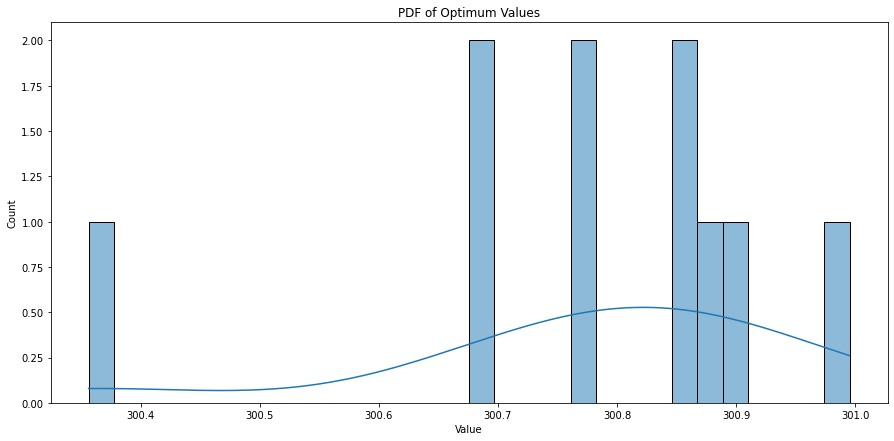

In [85]:
fig, ax = plt.subplots(figsize=(15,7))    
p = sns.histplot(max_, bins = 30, kde=True, legend = True,)
ax.set_title('PDF of Optimum Values')
ax.set_xlabel('Value')
ax.set_ylabel('Count')
plt.show()

In [112]:
accuracy = []
mean_time = []

for n in range(5): #Determines how many datapoints to generate 
    x = []
    y = []
    z = []
    itr_time = []
    for i in range(5): #How many iterations per datapoint 
        start = time.time()
        
        optimizer = BayesianOptimization(f=func, pbounds=pbounds, verbose=2)
        optimizer.maximize(init_points=10, n_iter=10)
        
        best_params = optimizer.max["params"]
        found_x = best_params["x"]
        found_y = best_params["y"]
        print("Found x: {}, f: {}".format(found_x, (func(found_x, found_y))))
        print("Found y: {}, f: {}".format(found_y, (func(found_x, found_y))))
        
        x.append(found_x)
        y.append(found_y)
        z.append(func(found_x, found_y))
        
        end = time.time()
        timetaken = end - start
        itr_time.append(timetaken)
        
    mean_time.append(np.mean(itr_time)/10)
    acc = np.mean(z)/max_value
    accuracy.append(acc)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  253.4    |  48.23    |  84.14    |
|  2        | -66.63    |  97.22    | -22.52    |
|  3        | -264.3    | -50.57    | -88.25    |
|  4        |  160.6    | -56.78    |  53.43    |
|  5        |  193.8    |  10.55    |  64.93    |
|  6        |  148.1    |  71.71    |  49.33    |
|  7        | -274.3    | -33.86    | -91.46    |
|  8        | -150.6    | -68.96    | -50.04    |
|  9        | -154.4    |  88.54    | -51.13    |
|  10       | -61.91    |  99.63    | -20.32    |
|  11       |  299.7    | -100.0    |  100.0    |
|  12       |  301.0    | -38.77    |  100.0    |
|  13       |  299.7    |  100.0    |  100.0    |
|  14       |  300.5    |  10.95    |  100.0    |
|  15       |  300.0    |  70.07    |  99.78    |
|  16       |  299.2    | -74.57    |  99.93    |
|  17       |  299.6    |  45.67    |  100.0    |
|  18       |  300.8    | -26.09    |  99.98    |


|  12       |  299.6    |  26.04    |  99.96    |
|  13       |  300.3    | -52.42    |  99.92    |
|  14       |  299.7    |  100.0    |  100.0    |
|  15       |  300.6    |  49.51    |  99.95    |
|  16       |  299.3    |  27.34    |  99.82    |
|  17       |  300.1    |  66.8     |  99.69    |
|  18       |  299.7    | -100.0    |  100.0    |
|  19       |  300.7    |  86.84    |  100.0    |
|  20       |  300.1    | -77.64    |  100.0    |
Found x: -25.358918745768598, f: 300.8144229381188
Found y: 100.0, f: 300.8144229381188
|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  20.67    |  72.47    |  7.223    |
|  2        | -282.5    |  30.43    | -94.42    |
|  3        |  83.91    |  26.3     |  27.87    |
|  4        | -190.3    |  55.16    | -63.75    |
|  5        |  231.8    |  67.17    |  76.96    |
|  6        |  195.8    |  43.45    |  65.17    |
|  7        |  92.09    |  34.64    |  30.67    |
|  8        

|  19       |  299.8    | -16.51    |  99.7     |
|  20       |  298.8    |  28.88    |  99.94    |
Found x: -30.819780677772112, f: 300.8902526806731
Found y: 100.0, f: 300.8902526806731
|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  29.75    |  90.36    |  9.64     |
|  2        | -222.5    | -58.03    | -73.95    |
|  3        |  163.7    |  85.45    |  54.24    |
|  4        | -0.8198   | -41.37    | -0.4977   |
|  5        |  77.13    |  36.13    |  26.02    |
|  6        | -98.5     |  97.9     | -33.14    |
|  7        |  56.07    |  45.08    |  18.53    |
|  8        | -26.71    |  93.25    | -8.721    |
|  9        | -255.0    | -34.54    | -84.78    |
|  10       |  133.2    | -85.69    |  44.6     |
|  11       |  299.1    | -16.21    |  100.0    |
|  12       |  298.1    | -14.8     |  99.59    |
|  13       |  298.7    |  47.47    |  99.88    |
|  14       |  299.7    |  100.0    |  100.0    |
|  15       

|  12       |  299.7    |  100.0    |  100.0    |
|  13       |  295.5    |  99.41    |  98.84    |
|  14       |  300.7    |  24.32    |  99.98    |
|  15       |  298.8    | -52.98    |  99.88    |
|  16       |  300.9    |  61.05    |  100.0    |
|  17       |  299.7    | -14.51    |  99.95    |
|  18       |  300.9    |  55.56    |  99.98    |
|  19       |  299.0    |  11.43    |  99.99    |
|  20       |  299.0    |  34.07    |  100.0    |
Found x: 55.55942564920866, f: 300.9151645002044
Found y: 99.98088310051477, f: 300.9151645002044
|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  15.98    |  22.7     |  5.25     |
|  2        |  283.1    |  40.06    |  94.31    |
|  3        | -143.7    | -35.14    | -47.88    |
|  4        | -170.0    | -35.23    | -56.7     |
|  5        |  132.9    |  21.65    |  44.52    |
|  6        |  136.2    |  56.62    |  45.09    |
|  7        | -274.8    | -97.34    | -91.68    |
| 

|  20       |  299.6    | -33.16    |  99.89    |
Found x: 51.434490292616886, f: 300.1679945770136
Found y: 99.96203040953412, f: 300.1679945770136
|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  190.0    | -7.941    |  63.27    |
|  2        |  238.1    |  70.23    |  79.53    |
|  3        |  39.41    |  21.96    |  13.47    |
|  4        | -11.41    |  76.38    | -3.745    |
|  5        |  83.65    |  35.63    |  27.73    |
|  6        | -91.76    | -6.322    | -30.84    |
|  7        | -282.8    | -27.5     | -94.52    |
|  8        | -9.721    |  15.01    | -2.959    |
|  9        | -45.05    |  93.32    | -14.9     |
|  10       | -37.5     |  14.04    | -12.74    |
|  11       |  299.7    | -100.0    |  100.0    |
|  12       |  300.0    |  17.55    |  100.0    |
|  13       |  238.9    |  68.55    |  79.92    |
|  14       |  299.9    | -52.06    |  99.67    |
|  15       |  299.7    |  100.0    |  100.0    |
|

|  12       |  298.7    |  36.32    |  99.72    |
|  13       |  299.7    | -100.0    |  100.0    |
|  14       |  300.8    |  73.78    |  99.96    |
|  15       |  296.6    |  72.94    |  99.2     |
|  16       |  299.1    | -25.89    |  100.0    |
|  17       |  298.0    | -72.94    |  99.65    |
|  18       |  300.1    |  0.7856   |  99.83    |
|  19       |  298.9    |  52.68    |  99.98    |
|  20       |  300.0    |  14.84    |  99.95    |
Found x: 73.77790107853792, f: 300.8259808280585
Found y: 99.96448072429018, f: 300.8259808280585
|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  237.4    |  34.41    |  79.06    |
|  2        | -10.45    | -8.541    | -3.27     |
|  3        | -167.8    |  61.95    | -55.76    |
|  4        | -97.51    | -74.93    | -32.51    |
|  5        |  54.16    |  30.95    |  17.9     |
|  6        |  18.07    | -60.07    |  5.695    |
|  7        | -42.71    |  64.25    | -14.44    |
| 

In [113]:
Type_of_optimizer = 'Bayes'
Type_of_function = 'Trig'
n_of_params = 2

In [114]:
accuracy = np.asarray(accuracy).reshape(-1,1)
mean_time = np.asarray(mean_time).reshape(-1,1)
type_of_opt = np.asarray([Type_of_optimizer]*accuracy.shape[0]).reshape(-1,1)
num_of_params = np.asarray([n_of_params]*accuracy.shape[0]).reshape(-1,1)
type_of_func = np.asarray([Type_of_function]*accuracy.shape[0]).reshape(-1,1)
data = np.hstack((num_of_params, type_of_func,accuracy, mean_time, type_of_opt))
df2 = pd.DataFrame(data, columns=['number of parameters','type of function','accuracy [calc. max/ actual max]', 'time per trial [s]', 'type_of_opt'])

In [115]:
df2

,number of parameters,type of function,accuracy [calc. max/ actual max],time per trial [s],type_of_opt
0,2,Trig,0.9993723408853696,0.2968326711654663,Bayes
1,2,Trig,0.998826167853054,0.21193836688995363,Bayes
2,2,Trig,0.9983483791920693,0.20650527477264405,Bayes
3,2,Trig,0.9984891372363317,0.23295145034790038,Bayes
4,2,Trig,0.9993941955409945,0.2160735034942627,Bayes


In [69]:
df2.to_excel('Data_Bayes.xlsx')